In [1]:
# Lets import all the required Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [14]:
reviews=pd.read_csv(r"C:\Users\shari\Desktop\Sentiment\Reviews.csv")
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [15]:
def label(x):
    if x>3:
        return 1
    elif x<3:
        return 0
    elif x==3:
        return 3

In [16]:
reviews["Score"]=reviews["Score"].map(label)
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
reviews.drop(reviews[reviews.Score==3])

KeyError: "['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'\n 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text'] not found in axis"

In [10]:
reviews=reviews[:30000]

In [11]:
reviews.shape

(30000, 10)

In [12]:
#checking if we have any missing values, if we have any wee can remove using the next cell
reviews["Score"].isna().any()

True

In [13]:
boo=pd.notnull(reviews['Score'])
reviews[boo].isnull().any()
reviews_late=reviews[boo]
reviews_late.shape

(27507, 10)

In [14]:
#understanding the data labels
#1:positive 0:negative 8:Neutral
reviews_late['Score'].value_counts()

1.0    23068
0.0     4439
Name: Score, dtype: int64

In [15]:
#we can observe that we have an unbalanced dataset
#because we have positive reviews way more than negative and negative iver neutral

In [16]:
reviews_late.shape
reviews=reviews_late

### The whole goal is to predict the sentiment over the text review, so we will juts consider text as our X and Score should be our label

In [17]:
reviews['Text'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [18]:
#with text we should check for any duplicate data, fo rthat we will be using duplicate
reviews_dropped=reviews.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)

In [19]:
print(reviews.shape)
reviews_dropped.shape

(27507, 10)


(26325, 10)

In [20]:
reviews_dropped.shape[0]/reviews.shape[0]
#this gives the amount off data retained after removing missing data and duplicated data. This is a cleaned data taken for next step of pre processing/data cleaning


0.9570291198603992

## Text Pre processing

In [21]:
#though we removed noise data, we need to make sure that our data is clean
#with text data comes a lot of unwanted characcters, symbols, numbers and common words which is ofcourse no use for model building
#so we will try to remove this unwanted characters to get a clean data
#for this wee will be using only text(reviews)


In [22]:
reviews_dropped['Text'][34]

"Instant oatmeal can become soggy the minute the water hits the bowl. McCann's Instant Oatmeal holds its texture, has excellent flavor, and is good for you all at the same time. McCann's regular oat meal is excellent, too, but may take a bit longer to prepare than most have time for in the morning. This is the best instant brand I've ever eaten, and a very close second to the non-instant variety.<br /><br />McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)"

In [23]:
#If we see the abbove review we can observe that there are some html tags inside the review text which is absolutely no use


In [24]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [25]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [26]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
pre_processed_reviews=[]
for review in tqdm(reviews_dropped['Text'].values):
    review= re.sub(r"http\S+","",review)             #remove 
    review= BeautifulSoup(review,'lxml').getText()    #remove html tags
    review=decontracted(review)
    review=re.sub('\S*\d\S*','',review).strip()        #remove numbers
    review=re.sub('[^A-Za-z]+',' ',review)            #remove speccial chars
    # now we will split the review into words and then check if these words are in the stop words if so we will remove them, if not we will join
    review=' '.join(word.lower() for word in review.split() if word.lower() not in stopwords)
    pre_processed_reviews.append(review.strip())

100%|██████████████████████████████████████████████████████████████████████████| 26325/26325 [00:07<00:00, 3586.27it/s]


In [27]:
pre_processed_reviews[34]

'mccann instant irish oatmeal variety pack regular apples cinnamon maple brown sugar boxes pack fan mccann steel cut oats thought would give instant variety try found hardy meal not sweet great folks like post bariatric surgery need food palatable easily digestible fiber not make bloat'

In [138]:
sentiment=reviews_dropped['Score']
type(sentiment),type(pre_processed_reviews)

(pandas.core.series.Series, list)

In [139]:
preporcessed_data=pd.DataFrame({'Reviews':pre_processed_reviews,'Sentiment':sentiment})

In [140]:
preporcessed_data.columns

Index(['Reviews', 'Sentiment'], dtype='object')

In [141]:
preporcessed_data["Sentiment"].value_counts()

1.0    22118
0.0     4207
Name: Sentiment, dtype: int64

# Featuriztion

Though we now have cleaned our data , our machine wont be able to understand it. The text needs to be convertedd into form where macchine undetstands
For this we use different text featurization/ word embeddings, we will use below
1. BOW: 
2. TFIDF:
3. wORD2VEC:

### BOW

In [142]:
#BOW:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
preporcessed_data.shape

(26325, 2)

In [143]:
#lets split our dataset prior applying featurization just to avoid the data leakage to the model
reviews_train,reviews_test,sentiment_train,sentiment_test=train_test_split(preporcessed_data['Reviews'],preporcessed_data['Sentiment'],test_size=0.25)
#reviews_train,reviews_valid,sentiment_train,sentiment_valid=train_test_split(Reviews_tr,Sentiment_tr,test_size=0.25)

In [144]:
print(reviews_train.shape,sentiment_train.shape)
#print(reviews_valid.shape,sentiment_valid.shape)
print(reviews_test.shape,sentiment_test.shape)


(19743,) (19743,)
(6582,) (6582,)


In [145]:
bow_model=CountVectorizer(ngram_range=(1,2))
bow_model.fit(reviews_train,sentiment_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [146]:
reviews_train_bow=bow_model.transform(reviews_train)
#reviews_valid_bow=bow_model.transform(reviews_valid)
reviews_test_bow=bow_model.transform(reviews_test)

In [147]:
reviews_train_bow.shape,reviews_test_bow.shape

((19743, 441854), (6582, 441854))

### TFIDF

In [148]:
#Similiarly TFIDF
tfidf_model=TfidfVectorizer(ngram_range=(1,2),min_df=10, max_features=5000)
tfidf_model.fit(reviews_train,sentiment_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [149]:
reviews_train_tfidf=tfidf_model.transform(reviews_train)
#reviews_valid_tfidf=tfidf_model.transform(reviews_valid)
reviews_test_tfidf=tfidf_model.transform(reviews_test)
reviews_train_tfidf.shape,reviews_test_tfidf.shape

((19743, 5000), (6582, 5000))

### Word2Vec

In [32]:
from gensim.models import Word2Vec
w2v_model=Word2Vec([reviews.split()for reviews in pre_processed_reviews],min_count=5,size=50)

unable to import 'smart_open.gcs', disabling that module


In [33]:
#rr=[reviews.split()for reviews in pre_processed_reviews]

In [34]:
len(w2v_model.wv.vocab), w2v_model.wv.similar_by_word("great"), w2v_model.wv.similar_by_word("terrible")

(10320,
 [('awesome', 0.8410056829452515),
  ('good', 0.8073111176490784),
  ('fantastic', 0.8000523447990417),
  ('excellent', 0.7754327654838562),
  ('amazing', 0.754361093044281),
  ('wonderful', 0.753700852394104),
  ('perfect', 0.7440652847290039),
  ('decent', 0.7125983834266663),
  ('terrific', 0.7013369798660278),
  ('nice', 0.6323262453079224)],
 [('horrible', 0.9405648708343506),
  ('awful', 0.9282412528991699),
  ('disgusting', 0.8852945566177368),
  ('funny', 0.8781638145446777),
  ('gross', 0.8739168643951416),
  ('bad', 0.8654829263687134),
  ('weird', 0.8551545739173889),
  ('odd', 0.8438894748687744),
  ('nasty', 0.8308532238006592),
  ('okay', 0.7976494431495667)])

In [35]:
#taking all reviews and then all words inside a a review, check if the word is in our vocab then get their weights using w2v_model.wv[word].
# add these dimensions to the empty list created sent_vec and divide by total no of words, then again add it to a list
w2v_words=w2v_model.wv.vocab

def avg_w2v(data):
    data_avg_w2v=[]
    for sent in tqdm(data):
        # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        data_avg_w2v.append(sent_vec)
    return data_avg_w2v

In [36]:
w2v_words

{'bought': <gensim.models.keyedvectors.Vocab at 0x27afe65d4c8>,
 'several': <gensim.models.keyedvectors.Vocab at 0x27afe65d488>,
 'vitality': <gensim.models.keyedvectors.Vocab at 0x27afe65d508>,
 'canned': <gensim.models.keyedvectors.Vocab at 0x27afe65d548>,
 'dog': <gensim.models.keyedvectors.Vocab at 0x27afe65d5c8>,
 'food': <gensim.models.keyedvectors.Vocab at 0x27afe65d648>,
 'products': <gensim.models.keyedvectors.Vocab at 0x27afe65d688>,
 'found': <gensim.models.keyedvectors.Vocab at 0x27afe65d6c8>,
 'good': <gensim.models.keyedvectors.Vocab at 0x27afe65d588>,
 'quality': <gensim.models.keyedvectors.Vocab at 0x27afe65d608>,
 'product': <gensim.models.keyedvectors.Vocab at 0x27afe65d708>,
 'looks': <gensim.models.keyedvectors.Vocab at 0x27afe65d748>,
 'like': <gensim.models.keyedvectors.Vocab at 0x27afe65d788>,
 'stew': <gensim.models.keyedvectors.Vocab at 0x27afe65d7c8>,
 'processed': <gensim.models.keyedvectors.Vocab at 0x27afe65d808>,
 'meat': <gensim.models.keyedvectors.Vocab 

In [41]:
review_train_w2v=avg_w2v(reviews_train)
#review_valid_w2v=avg_w2v(reviews_valid)
review_test_w2v=avg_w2v(reviews_test)

100%|███████████████████████████████████████████████████████████████████████████| 7554/7554 [00:00<00:00, 10222.16it/s]


In [42]:
len(review_train_w2v),  len(review_test_w2v)

(22661, 7554)

In [47]:
train_w2v=pd.DataFrame({'test':review_train_w2v,'sentiment':sentiment_train})
train_w2v=pd.DataFrame({'test':review_train_w2v,'sentiment':sentiment_train})
train_w2v=pd.DataFrame({'test':review_train_w2v,'sentiment':sentiment_train})


In [51]:
import pickle
pickle.dump(w2v_model.wv,(open('w2v.pkl','wb')))

In [55]:
w2=pickle.load(open('w2v.pkl','rb'))

In [58]:
w2.

<bound method Word2VecKeyedVectors.load_word2vec_format of <class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>>

In [48]:
cleaned_data=avg_w2v(pre_processed_reviews)

100%|██████████████████████████████████████████████████████████████████████████| 30215/30215 [00:03<00:00, 8873.10it/s]


In [49]:
cleaned_data_w2v=pd.DataFrame({'reviews':cleaned_data,'sentiment':preporcessed_data['Sentiment']})

In [50]:
cleaned_data_w2v.head()

,reviews,sentiment
0,"[0.3193761995467155, 0.06168496276697387, 0.40...",1.0
1,"[-0.003723637249908949, 0.0564720313015737, 0....",0.0
2,"[0.36857374659074205, 0.2421747285872698, -0.0...",1.0
3,"[0.8247355166822672, 0.3909959378926193, 0.233...",0.0
4,"[0.32465053636294144, 0.05416563189087006, 0.7...",1.0


In [51]:
#cleaned_data_w2v.to_csv('cleaned_data.csv')

In [52]:
review_train_w2v[1]

array([ 0.26772818, -0.20688301,  0.23760161, -0.69734184, -0.37124857,
       -0.37838179,  0.43133286,  0.2577066 ,  0.3622393 ,  0.02288228,
        0.11915935, -0.85624746,  0.93961431, -0.02447382,  0.26294741,
       -0.0064035 , -0.82529307,  0.40406981,  1.43209739,  0.17831561,
       -0.46708535,  0.03696232, -0.52099738, -0.19553984,  0.29786816,
       -0.76581931, -0.58133178,  0.56427324,  0.60681393,  0.69724266,
        0.64067366,  0.67364454, -0.08519701,  0.63054077, -0.41061876,
        0.26000822,  0.99506901, -0.19316991,  0.08023337, -0.0874847 ,
        0.1635774 , -0.71005504,  0.49818505, -0.57325272,  0.4079247 ,
        1.25691801,  0.49990119, -0.03144827, -0.00370069, -0.14391693])

## 1.  KNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV


#lets start our KNN model
params={'n_neighbors':[i for i in range(1,30,2)],
                   }
knn_classifier=KNeighborsClassifier()

rndm_clf=RandomizedSearchCV(knn_classifier,params,scoring='roc_auc')
rndm_clf.fit(reviews_train_tfidf,sentiment_train)


C:\Users\shari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [152]:
best_params=rndm_clf.best_estimator_
best_params

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [153]:
from sklearn.metrics import roc_curve,auc

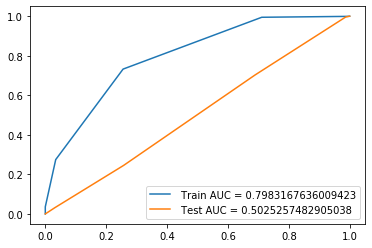

In [154]:
neighbor=29
knn_model=KNeighborsClassifier(neighbor,)
knn_model.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,threshold=roc_curve(sentiment_train,knn_model.predict_proba(reviews_train_tfidf)[:,1])
test_fpr,test_tpr,threshold=roc_curve(sentiment_test,knn_model.predict_proba(reviews_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label=" Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label=" Test AUC = "+str(auc(test_fpr,test_tpr)))
plt.legend()

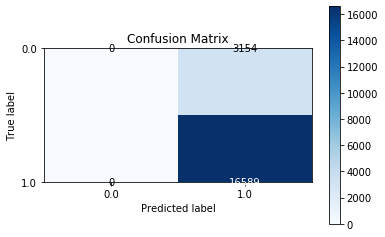

In [155]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(sentiment_train,knn_model.predict(reviews_train_tfidf))

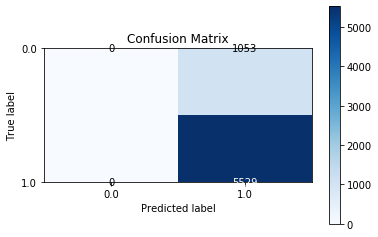

In [156]:
plot_confusion_matrix(sentiment_test,knn_model.predict(reviews_test_tfidf))
plt.show()

In [164]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [166]:
precision_score(sentiment_test,knn_model.predict(reviews_test_tfidf))

0.8400182315405652

In [167]:
recall_score(sentiment_test,knn_model.predict(reviews_test_tfidf))

1.0

In [168]:
knn_f1_score=f1_score(sentiment_test,knn_model.predict(reviews_test_tfidf))
knn_f1_score

0.9130542482041121

### Observation

1. 

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In [95]:
lr_params={'penalty':['l1','l2'],
        'C':[10**i for i in range(-4,4)]}
    
logistic_model=LogisticRegression()
rndm_clf=RandomizedSearchCV(logistic_model,lr_params)
rndm_clf.fit(review_train_w2v,sentiment_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, r

In [96]:
rndm_clf.best_params_

{'penalty': 'l1', 'C': 1}

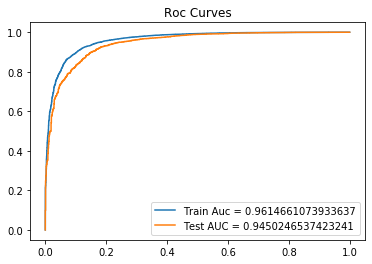

In [515]:
lr_model=LogisticRegression(penalty='l1',C=1)
lr_model.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,threshold=roc_curve(sentiment_train,lr_model.predict_proba(reviews_train_tfidf)[:,1])
test_fpr,test_tpr,threshold=roc_curve(sentiment_test,lr_model.predict_proba(reviews_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label='Train Auc = '+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test AUC = '+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.title("Roc Curves")
plt.show()

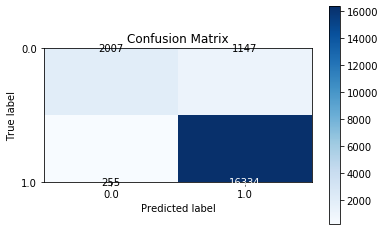

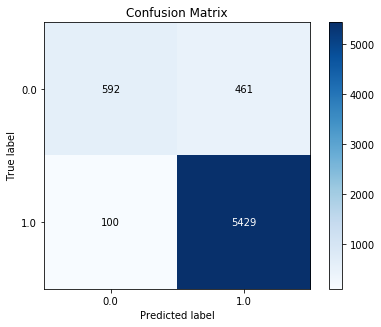

In [514]:

plot_confusion_matrix(sentiment_train,lr_model.predict(reviews_train_tfidf))
plot_confusion_matrix(sentiment_test,lr_model.predict(reviews_test_tfidf))
plt.tight_layout()
plt.ylim([1.5, -.5])
plt.show()

In [172]:
lr_f1_score=f1_score(sentiment_test,lr_model.predict(reviews_test_tfidf))
print('precision :' ,precision_score(sentiment_test,lr_model.predict(reviews_test_tfidf)))
print('Recall :' ,recall_score(sentiment_test,lr_model.predict(reviews_test_tfidf)))
print('Logistic regression f1_Score:',lr_f1_score)

precision : 0.9217317487266553
Recall : 0.9819135467534816
Logistic regression f1_Score: 0.9508713547596113


### Observation:

1. 

## SVM

In [174]:
from sklearn.svm import LinearSVC
from sklearn.linear_model  import SGDClassifier
svc_params={'penalty':['l1','l2'],
        'C':[10**i for i in range(-4,4)]}
sgd_params={'penalty':['l1','l2'],
        'alpha':[10**i for i in range(-4,4)]}
svc_model=LinearSVC(dual=False)
sgd_svm=SGDClassifier()

In [134]:
rndm_clf=RandomizedSearchCV(svc_model,svc_params)
rndm_clf.fit(review_train_w2v,sentiment_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [135]:
rndm_clf.best_estimator_

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [136]:
rnd_clf=RandomizedSearchCV(sgd_svm,sgd_params,scoring='roc_auc')
rnd_clf.fit(review_train_w2v,sentiment_train)
rnd_clf.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [176]:
from sklearn.calibration import CalibratedClassifierCV

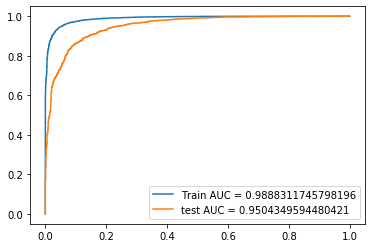

In [177]:
#reglar svm
svm_model=LinearSVC(penalty='l1',C=1,dual=False)
cal_clf=CalibratedClassifierCV(svm_model,cv=5)
cal_clf.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,thresh=roc_curve(sentiment_train,cal_clf.predict_proba(reviews_train_tfidf)[:,1])
test_fpr,test_tpr,thresh=roc_curve(sentiment_test,cal_clf.predict_proba(reviews_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test AUC = '+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.show()

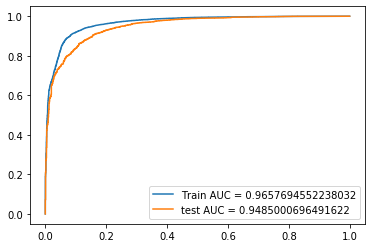

In [179]:
#svm with SGD
sgd_svm_model=SGDClassifier(penalty='l2',alpha=0.001)
cal_clf1=CalibratedClassifierCV(sgd_svm_model,cv=5)
cal_clf1.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,thresh=roc_curve(sentiment_train,cal_clf1.predict_proba(reviews_train_tfidf)[:,1])
test_fpr,test_tpr,thresh=roc_curve(sentiment_test,cal_clf1.predict_proba(reviews_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test AUC = '+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.show()

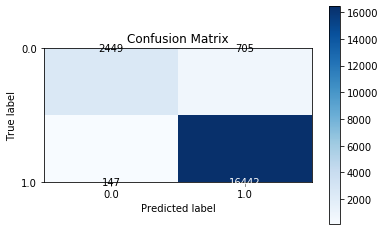

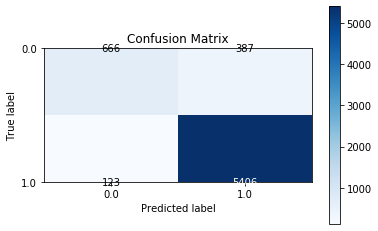

In [180]:
plot_confusion_matrix(sentiment_train,cal_clf.predict(reviews_train_tfidf))
plot_confusion_matrix(sentiment_test,cal_clf.predict(reviews_test_tfidf))

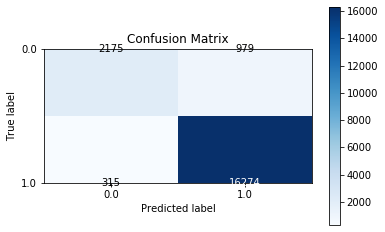

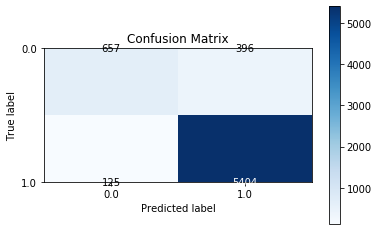

In [181]:
plot_confusion_matrix(sentiment_train,cal_clf1.predict(reviews_train_tfidf))
plot_confusion_matrix(sentiment_test,cal_clf1.predict(reviews_test_tfidf))

In [200]:
svm_f1=f1_score(sentiment_test,cal_clf.predict(reviews_test_tfidf))
svm_f1

0.954954954954955

### Observation

1.

## Decision Trees

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
dt_param={'max_depth':[i for i in range(5,2000,3)],
         'min_samples_split':[i for i in range(5,2000,3)]}
dt_clf=DecisionTreeClassifier()
rndm_clf=RandomizedSearchCV(dt_clf,dt_param)
rndm_clf.fit(reviews_train_tfidf,sentiment_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='b

In [185]:
rndm_clf.best_params_

{'min_samples_split': 275, 'max_depth': 41}

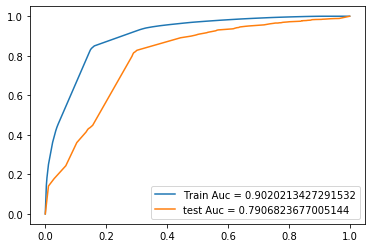

In [187]:
dt_clf=DecisionTreeClassifier(max_depth=41,min_samples_split=275
                             )
dt_clf.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,thresh=roc_curve(sentiment_train,dt_clf.predict_proba(reviews_train_tfidf)[:,1])
test_fpr,test_tpr,thresh=roc_curve(sentiment_test,dt_clf.predict_proba(reviews_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label='Train Auc = '+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test Auc = '+str(auc(test_fpr,test_tpr)))
plt.legend()

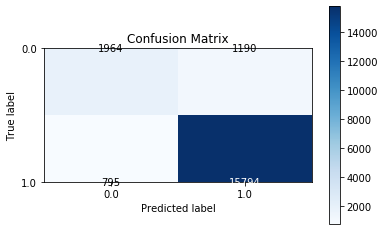

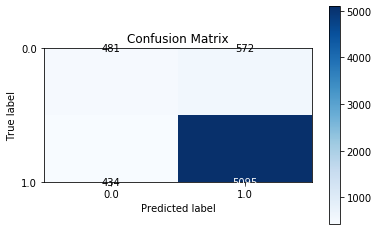

In [189]:
plot_confusion_matrix(sentiment_train,dt_clf.predict(reviews_train_tfidf))
plot_confusion_matrix(sentiment_test,dt_clf.predict(reviews_test_tfidf))

In [198]:
DT_f1=f1_score(sentiment_test,dt_clf.predict(reviews_test_tfidf))
DT_f1

0.9101464808860308

#### Observation
1.

## Random forrests

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf_param={'n_estimators':[i for i in range(10,1000,10)],
          'max_depth':[i for i in range(5,2000,3)]}

rf_clf=RandomForestClassifier()
rndm_clf=RandomizedSearchCV(rf_clf,rf_param,scoring='roc_auc')
rndm_clf.fit(reviews_train_tfidf,sentiment_train)
rndm_clf.best_params_

KeyboardInterrupt: 

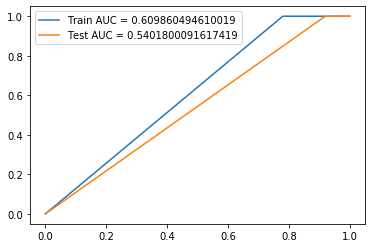

In [193]:
rf_clf=RandomForestClassifier(n_estimators=910,max_depth=26)
rf_clf.fit(reviews_train_tfidf,sentiment_train)
train_fpr,train_tpr,thresh=roc_curve(sentiment_train,rf_clf.predict(reviews_train_tfidf))
test_fpr,test_tpr,thresh=roc_curve(sentiment_test,rf_clf.predict(reviews_test_tfidf))
plt.plot(train_fpr,train_tpr,label='Train AUC = '+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test AUC = '+str(auc(test_fpr,test_tpr)))
plt.legend()

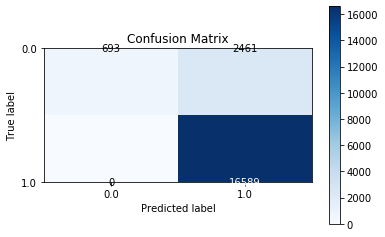

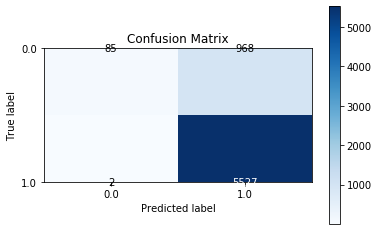

In [194]:
plot_confusion_matrix(sentiment_train,rf_clf.predict(reviews_train_tfidf))
plot_confusion_matrix(sentiment_test,rf_clf.predict(reviews_test_tfidf))

In [195]:
random_forrest_f1=f1_score(sentiment_test,rf_clf.predict(reviews_test_tfidf))

In [196]:
random_forrest_f1

0.9193280106453761

### Observation

## Summarizing all the models F1_score

In [216]:
models=['KNN','LogisticRegression','SVM','DecisionTree','RandomForest']
f1_scoress=[knn_f1_score,lr_f1_score,svm_f1  , DT_f1 ,random_forrest_f1]

model_p={'KNN':knn_f1_score,'LogisticRegression':lr_f1_score,'SVM':svm_f1,'DecisionTree':DT_f1,'RandomForest':random_forrest_f1
        }

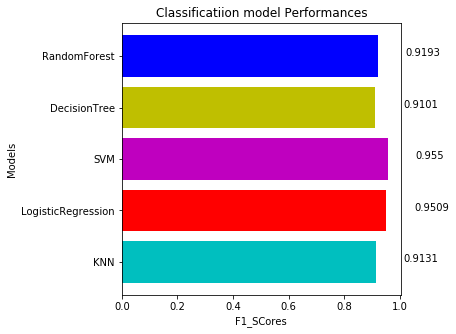

In [455]:
plt.figure(figsize=(5,5))
colors = ['c','r','m','y','b']
plt.barh(models,f1_scoress,color=colors)
plt.title("Classificatiion model Performances")
for index, value in enumerate(f1_scoress):
    plt.text(value+0.1,index,str(round(value,4)))
plt.xlabel('F1_SCores',)
plt.ylabel("Models")
plt.savefig("f1_scores.png")
plt.show()


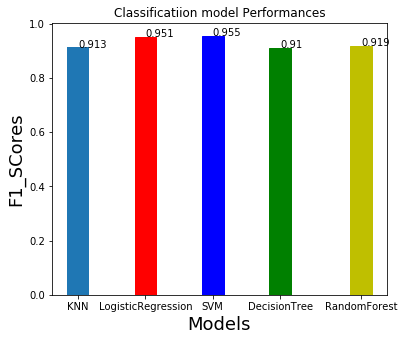

In [383]:
plt.figure(figsize=(6,5))
pos = [0,5,5,7,10.5]
f1_scoresss=[]
for i in f1_scoress:
    i=round(i,3)
    f1_scoresss.append(i)
p=plt.bar(y_pos,f1_scoresss)
#plt.xticks(rotation=45)
plt.xticks(y_pos, models)
p[1].set_color('r')
p[2].set_color('b')
p[3].set_color('g')
p[4].set_color('y')
plt.title("Classificatiion model Performances")
plt.ylabel('F1_SCores',fontsize=18)


plt.xlabel("Models",fontsize=18)

for i in range(len(f1_scoresss)):
    plt.annotate(str(f1_scoresss[i]), xy=(y_pos[i],f1_scoresss[i]))

plt.show()


#### Observation:
    From Above plot we can see that all models are doing just fine
    Logistic regression and SVM models have the highest Accuracy of around 95%
    We will Use any one of these two and see the other plottings.

### Obtaining the top 15 positive and Negative features

In [478]:
# we will do this with the help of feature importance
features=tfidf_model.get_feature_names()
features

['ability',
 'able',
 'able find',
 'able get',
 'absolute',
 'absolute favorite',
 'absolutely',
 'absolutely delicious',
 'absolutely love',
 'absolutely loves',
 'absolutely no',
 'acceptable',
 'accident',
 'accidentally',
 'according',
 'accustomed',
 'acerola',
 'acid',
 'acid coffee',
 'acid reflux',
 'acidic',
 'acidity',
 'acids',
 'across',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'actually good',
 'actually like',
 'actually taste',
 'actually tastes',
 'add',
 'add little',
 'add water',
 'added',
 'added bonus',
 'added sugar',
 'addict',
 'addicted',
 'addicting',
 'addiction',
 'addictive',
 'adding',
 'addition',
 'additional',
 'additives',
 'address',
 'adds',
 'adequate',
 'adjust',
 'admit',
 'adopted',
 'adore',
 'adult',
 'adults',
 'advantage',
 'advertised',
 'advertising',
 'advice',
 'affect',
 'afford',
 'affordable',
 'afraid',
 'afternoon',
 'aftertaste',
 'afterwards',
 'agave',
 'agave nectar',
 'age',
 'ages',
 'ago',
 'agree',
 'ahead

In [479]:
feature_weights=sorted(zip(lr_model.coef_[0],features))
feature_weights

[(-12.278236934430117, 'disappointed'),
 (-11.871366881070756, 'worst'),
 (-10.162635540692436, 'not worth'),
 (-10.109123484667927, 'awful'),
 (-9.485470324392791, 'not recommend'),
 (-9.088057293094502, 'not good'),
 (-8.953316560673638, 'disappointing'),
 (-8.841175432918629, 'terrible'),
 (-8.250187448944388, 'not happy'),
 (-7.958958008540033, 'unfortunately'),
 (-7.857088025706618, 'horrible'),
 (-6.309014013841914, 'not purchase'),
 (-6.103976246063277, 'refund'),
 (-6.060896780231568, 'grounds'),
 (-5.931822807092083, 'not'),
 (-5.839185406661142, 'died'),
 (-5.75665303592066, 'hopes'),
 (-5.6648104235740515, 'weak'),
 (-5.429166250119665, 'vomiting'),
 (-5.377386431542474, 'disappointment'),
 (-5.370262730569515, 'not buy'),
 (-5.32417269995966, 'hoping'),
 (-5.234014095729726, 'bad'),
 (-5.151139501426503, 'shame'),
 (-5.0658864310757385, 'would good'),
 (-5.033577402310435, 'not buying'),
 (-4.95324232687744, 'money'),
 (-4.945609850996539, 'thinking'),
 (-4.9282190693192005

In [497]:
neg_15=feature_weights[:15]
neg_15

[(-12.278236934430117, 'disappointed'),
 (-11.871366881070756, 'worst'),
 (-10.162635540692436, 'not worth'),
 (-10.109123484667927, 'awful'),
 (-9.485470324392791, 'not recommend'),
 (-9.088057293094502, 'not good'),
 (-8.953316560673638, 'disappointing'),
 (-8.841175432918629, 'terrible'),
 (-8.250187448944388, 'not happy'),
 (-7.958958008540033, 'unfortunately'),
 (-7.857088025706618, 'horrible'),
 (-6.309014013841914, 'not purchase'),
 (-6.103976246063277, 'refund'),
 (-6.060896780231568, 'grounds'),
 (-5.931822807092083, 'not')]

In [499]:
pos_15=feature_weights[-15:]
pos_15

[(6.62785484346924, 'amazing'),
 (6.73775403941133, 'wonderful'),
 (6.764031941667135, 'hooked'),
 (6.772357936259725, 'happy'),
 (6.84083910558103, 'glad'),
 (6.907705694697376, 'nice'),
 (8.21049519452401, 'love'),
 (9.066862049668465, 'loves'),
 (9.161968297786343, 'excellent'),
 (9.56610180585917, 'perfect'),
 (9.8332982788538, 'good'),
 (10.62382518507478, 'best'),
 (11.702528925341307, 'delicious'),
 (12.124733301348027, 'great'),
 (14.996203390090008, 'not disappointed')]

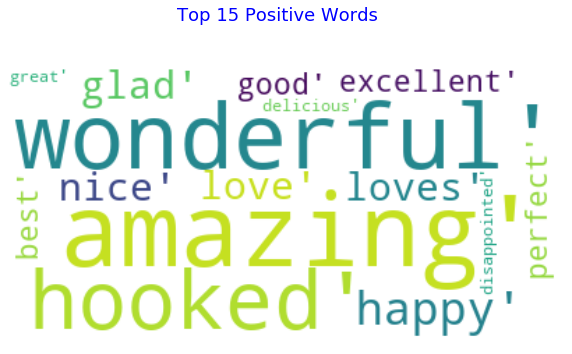

In [507]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.figure(figsize=(10,8))
#Create and generate a word cloud for positive and negative words
word_cloud=WordCloud(max_words=20,background_color='white').generate(str(pos_15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.suptitle('Top 15 Positive Words', size=18, y=0.85,color='b'); 
plt.axis("off")
plt.savefig("positive_wordcloud.png")
plt.show()

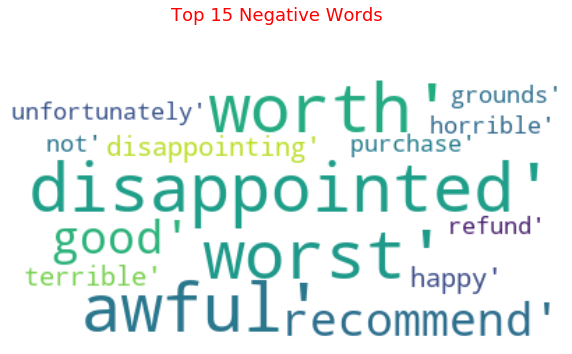

In [505]:
plt.figure(figsize=(10,8))
#Create and generate a word cloud for positive and negative words
word_cloud=WordCloud(max_words=20,background_color='white').generate(str(neg_15))
plt.imshow(word_cloud, interpolation='bilinear')
#plt.title("Top 10 Negative images",fontsize=18)
plt.axis("off")
plt.suptitle('Top 15 Negative Words', size=18, y=0.85,color='r');      
plt.savefig('negative_wordcloud.png')
plt.show()
